In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

# Генерування полінома

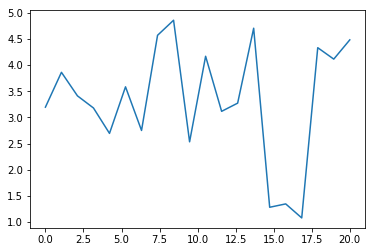

In [35]:
np.random.seed(0)
X = np.linspace(0.0, 20.0, 20)
Y = np.random.uniform(1, 5, 20)
pl = plt.plot(X,Y)

In [36]:
coef = np.polyfit(X, Y, 10)
F  = np.poly1d(coef)

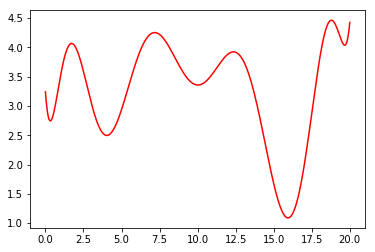

In [37]:
X = np.linspace(0.0, 20.0, 1000)
Pt0 = F(X)
pl = plt.plot(X,Pt0,color='red')

## Алгоритм

1) Генеруємо початкову популяцію Pt

2) Генерація популяції з випадковим рухом вліво чи вправо на випадкову величину

3) Ділення наполовину. Беремо випадкові 2 точки та знаходимо середню

4) Об'єднуємо популяції 

5) Знаходимо точки які дають максимальне значення => отримуємо нову Pt 

6) Перевіряємо умову виходу

In [40]:
class Stars_algo():
    def __init__(self,F,a,b,n,eps,e):
        self.F = F
        self.a = a
        self.b = b
        self.n = n
        self.eps = eps
        self.e = e
        self.iteration = 0
        self.Pt = np.linspace(a, b, n)
        self.Pz = []
        self.Ps = []
    
    def check_Pz(self):
        for i in range(len(self.Pz)):
            x = self.Pz[i]
            if x < a:
                delta = np.abs(self.a-x)
                self.Pz[i] = self.b - delta
            if x > b:
                delta = np.abs(self.b-x)
                self.Pz[i] = self.a + delta
    
    def generate_Pz(self):
        np.random.seed(0)
        z = np.random.normal(0, self.eps, self.n)
        self.Pz  = self.Pt + z
        self.check_Pz()
    
    def generate_Ps(self):
        P1 = np.random.uniform(a,b,n)
        P2 = np.random.uniform(a,b,n)
        self.Ps = (P1+P2)/2.
    
    def find_new_Pt(self):
        self.generate_Pz()
        self.generate_Ps()
        P = list(set(self.Pt).union(set(self.Pz),set(self.Ps)))
        values = self.F(P)
        S = list(zip(values,P))
        S.sort()
        max_pairs = S[-20:]
        self.Pt = np.array([x[1] for x in max_pairs])
        
    def end_condition_1(self):
        return np.abs(self.Pt.max() - self.Pt.min()) < self.e
    
    def find_max(self):
        for i in range(300):
            self.find_new_Pt()
            if self.end_condition_1():
                print('Hooray, iteration:', i)
                return self.Pt[-1]
        print('Not found')
        return self.Pt[-1]
       

In [30]:
np.random.seed(0)
a = 0.0
b = 20.0
n = 20
eps = 1
e = 1

In [39]:
Star = Stars_algo(F,a,b,n,eps,e)
x_max = Star.find_max()
print('\nx_max =',x_max)

Huray iteration: 11

x_max = 18.801861755011963


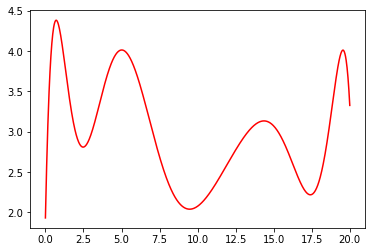

In [32]:
X = np.linspace(0.0, 20.0, 1000)
Pt0 = F(X)
pl = plt.plot(X,Pt0,color='red')

In [42]:
values = list(zip(Pt0,X))
values.sort()
real_x_max = values[-1][1]

print('x_max = ', x_max)
print('Real_x_max = ', real_x_max)

x_max =  18.801861755011963
Real_x_max =  18.7987987987988
